In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import requests
import pandas as pd
import numpy as np
import sqlalchemy as sqla
import plotnine as p9
import seaborn as sns

<IPython.core.display.Javascript object>

In [3]:
# Request hesitancy data
hesitancy_endpoint = "https://data.cdc.gov/resource/q9mh-h2tw.json?$limit=4000"
r = requests.get(hesitancy_endpoint)
hesitancy_df = pd.DataFrame(r.json())
hesitancy_df.head()

,fips_code,county_name,state,estimated_hesitant,estimated_hesitant_or_unsure,estimated_strongly_hesitant,social_vulnerability_index,svi_category,ability_to_handle_a_covid,cvac_category,...,percent_non_hispanic_asian,percent_non_hispanic_black,percent_non_hispanic_native,percent_non_hispanic_white,geographical_point,state_code,county_boundary,state_boundary,:@computed_region_hjsp_umg2,:@computed_region_skr5_azej
0,1123,"Tallapoosa County, Alabama",ALABAMA,0.1806,0.24,0.1383,0.89,Very High Vulnerability,0.64,High Concern,...,0.0036,0.2697,0,0.6887,"{'type': 'Point', 'coordinates': [-86.844516, ...",AL,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",29,94
1,1121,"Talladega County, Alabama",ALABAMA,0.1783,0.235,0.1368,0.87,Very High Vulnerability,0.84,Very High Concern,...,0.0061,0.3237,0.0003,0.6263,"{'type': 'Point', 'coordinates': [-86.844516, ...",AL,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",29,94
2,1131,"Wilcox County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.93,Very High Vulnerability,0.94,Very High Concern,...,0.0003,0.6938,0,0.2684,"{'type': 'Point', 'coordinates': [-86.844516, ...",AL,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",29,94
3,1129,"Washington County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.73,High Vulnerability,0.82,Very High Concern,...,0.0025,0.2354,0,0.6495,"{'type': 'Point', 'coordinates': [-86.844516, ...",AL,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",29,94
4,1133,"Winston County, Alabama",ALABAMA,0.1805,0.2313,0.1379,0.7,High Vulnerability,0.8,High Concern,...,0.0016,0.0073,0.0005,0.937,"{'type': 'Point', 'coordinates': [-86.844516, ...",AL,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",29,94


<IPython.core.display.Javascript object>

In [4]:
# Lets see the size of our dataframe
hesitancy_df.shape

(3142, 23)

<IPython.core.display.Javascript object>

In [11]:
# Extracting political party data from our public github
url = "https://raw.githubusercontent.com/gspiga/STAT141Bfinal/main/data/raw_data.csv"
poli_df = pd.read_csv(url)
poli_df.head()

,Location,Governor Political Affiliation,State Senate Majority Political Affiliation,State House Majority Political Affiliation,State Attorney General Political Affiliation,State Insurance Commissioner Political Affiliation,Footnotes
0,Alabama,Republican,Republican,Republican,Republican,Appointed,NaN
1,Alaska,Republican,Republican,Republican,Appointed,Appointed,NaN
2,Arizona,Republican,Republican,Republican,Republican,Appointed,NaN
3,Arkansas,Republican,Republican,Republican,Republican,Appointed,NaN
4,California,Democrat,Democrat,Democrat,Democrat,Democrat,NaN


<IPython.core.display.Javascript object>

In [12]:
# Changing one column in poli_df to upper case so that we may join them (pandas is case sensitive).
poli_df["Location"] = poli_df["Location"].apply(
    lambda x: x.upper()  # Uppercase all state names
)
poli_df.head()

,Location,Governor Political Affiliation,State Senate Majority Political Affiliation,State House Majority Political Affiliation,State Attorney General Political Affiliation,State Insurance Commissioner Political Affiliation,Footnotes
0,ALABAMA,Republican,Republican,Republican,Republican,Appointed,NaN
1,ALASKA,Republican,Republican,Republican,Appointed,Appointed,NaN
2,ARIZONA,Republican,Republican,Republican,Republican,Appointed,NaN
3,ARKANSAS,Republican,Republican,Republican,Republican,Appointed,NaN
4,CALIFORNIA,Democrat,Democrat,Democrat,Democrat,Democrat,NaN


<IPython.core.display.Javascript object>

In [14]:
# We join the dataframe
polihes_df = hesitancy_df.merge(poli_df, left_on="state", right_on="Location")

# Have to change decimal values from string to numeric
cols = [
    "estimated_hesitant",
    "estimated_hesitant_or_unsure",
    "estimated_strongly_hesitant",
    "estimated_strongly_hesitant",
    "social_vulnerability_index",
    "ability_to_handle_a_covid",
    "percent_non_hispanic_asian",
    "percent_non_hispanic_black",
    "percent_non_hispanic_native",
    "percent_non_hispanic_white",
]
polihes_df[cols] = polihes_df[cols].apply(pd.to_numeric, errors="coerce", axis=1)

<IPython.core.display.Javascript object>

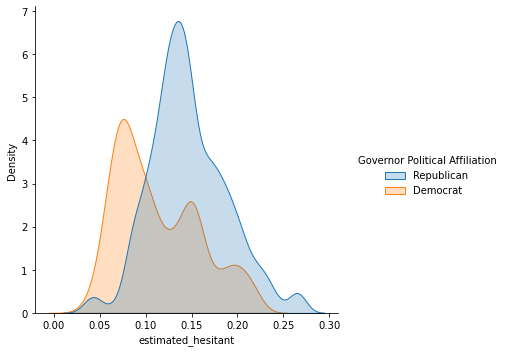

<IPython.core.display.Javascript object>

In [15]:
# Lets look at the distributions of over all hesitancy
# p9.ggplot(polihes_df, p9.aes(x = 'estimated_hesitant', y = ..density.., fill = 'Governor Political Affiliation', color = 'Governor Political Affiliation' )) + p9.geom_density(alpha = 0.3)
sns.displot(
    data=polihes_df,
    x="estimated_hesitant",
    hue="Governor Political Affiliation",
    fill=True,
    kind="kde",
)

Looking at the distributions of overall estimated hesitancy, we can see that the distribution of democratic led states has a more right skewed distribution while the distribution of Republican led states has a more roughly symmetric distribtuion. Lets observe the means of these groups. 

In [16]:
polihes_df.groupby(["Governor Political Affiliation"]).mean()

,estimated_hesitant,estimated_hesitant_or_unsure,estimated_strongly_hesitant,social_vulnerability_index,ability_to_handle_a_covid,percent_non_hispanic_asian,percent_non_hispanic_black,percent_non_hispanic_native,percent_non_hispanic_white,Footnotes
Governor Political Affiliation,,,,,,,,,,
Democrat,0.112877,0.169319,0.072663,0.469469,0.395411,0.018552,0.074884,0.001201,0.780671,NaN
Republican,0.146538,0.207053,0.096539,0.521559,0.573851,0.010136,0.099417,0.000720,0.749658,NaN


<IPython.core.display.Javascript object>

In [ ]:
# Lets compare the means of republican states and democratic states via a one-way anova, lets check our assumptions
#Normality